# Проект: Защита персональных данных клиентов

## Данные

В наличии были следующие данные:

- Пол
- Возраст
- Зарплата застрахованного
- Члены семьи - количество членов его семьи
- Страховые выплаты - количество страховых выплат клиенту за последние 5 лет


## Задача

Разработка модели анонимизации персональных данных.

## Используемые библиотеки

pandas, numpy, os, matplotlib, sklearn

## Загрузка данных

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [12]:
path = '/datasets/insurance.csv'
if not os.path.exists(path):
    path = '../DataFrames/insurance.csv'
    
data = pd.read_csv(path)

In [13]:
data.head(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


In [14]:
data.dtypes

Пол                    int64
Возраст              float64
Зарплата             float64
Члены семьи            int64
Страховые выплаты      int64
dtype: object

In [15]:
data.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

Переведем int 64 в int8 для освобождения памяти. Также приведем значения в столбцах Возраст и Зарплата к int. 


In [16]:
data['Пол'] = pd.to_numeric(data['Пол'], downcast='integer')
data['Возраст'] = pd.to_numeric(data['Возраст'], downcast='integer')
data['Члены семьи'] = pd.to_numeric(data['Члены семьи'], downcast='integer')
data['Страховые выплаты'] = pd.to_numeric(data['Страховые выплаты'], downcast='integer')
data['Зарплата'] = data['Зарплата'].astype(int)


data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                5000 non-null   int8 
 1   Возраст            5000 non-null   int8 
 2   Зарплата           5000 non-null   int64
 3   Члены семьи        5000 non-null   int8 
 4   Страховые выплаты  5000 non-null   int8 
dtypes: int64(1), int8(4)
memory usage: 58.7 KB


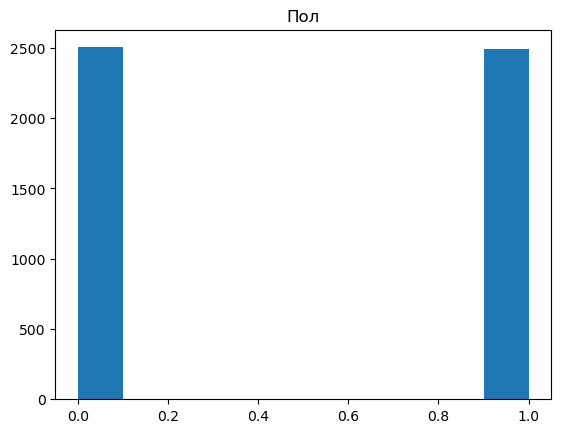

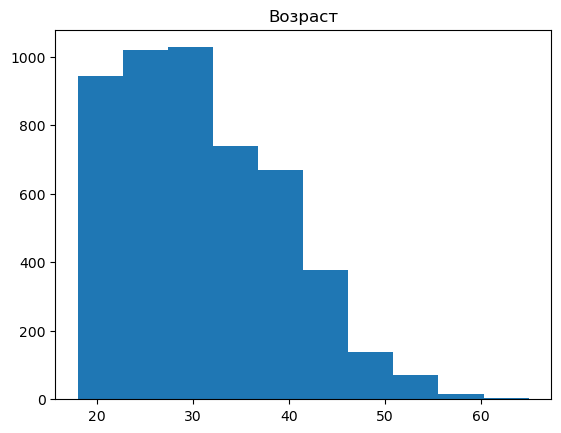

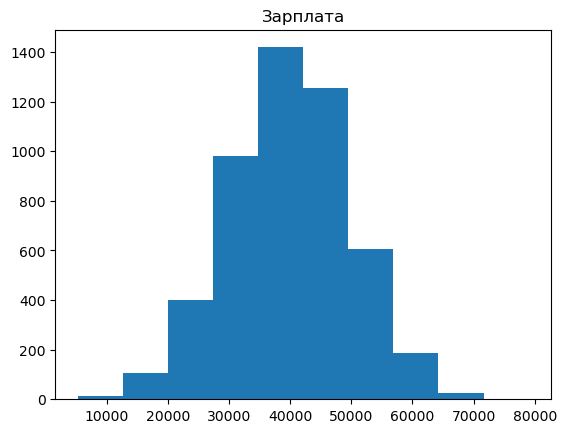

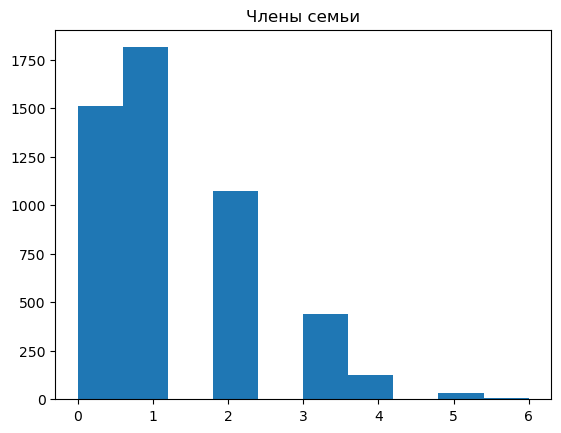

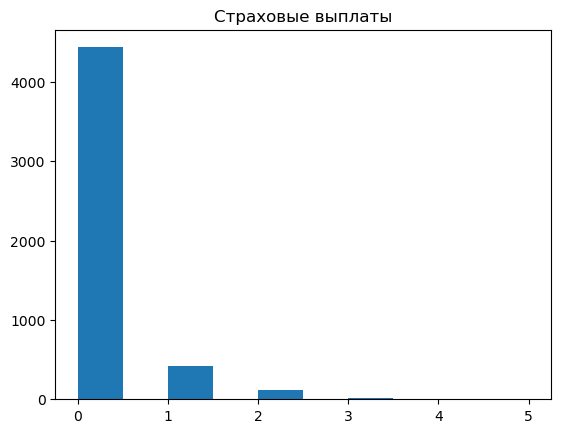

In [17]:
for column in data.columns:    
    plt.hist(data[column])
    plt.title(column)
    plt.show()

<div class="alert alert-block alert-info">
<b>Данные загружены и не имеют пропусков и аномалий.</b></div>

## Умножение матриц

 Признаки умножают на обратимую матрицу для шифрования. Изменится ли качество линейной регрессии? 

**Ответ:** Не изменится.

### Доказательство

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Обоснование:** Заменим X на XP. 
Свойства матриц:
$$
(AB)^T = B^T  A^T 
$$
$$
(AB)^{-1} = B^{-1}  A^{-1}
$$
$$
AA^{-1} = A^{-1}A = E
$$
$$
$$
$$
w1 = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w1 = (P^T X^T XP)^{-1} P^T X^T y
$$
$$
w1 = P^{-1}(X^T X)^{-1} (P^T)^{-1} P^T X^T y 
$$
т. к. P обратимая матрица
$$
(P^T)^{-1} P^T = E
$$
$$
w1 = P^{-1}(X^T X)^{-1} E X^T y 
$$
$$
a1 = XPw1
$$
$$
a1 = XPP^{-1} w = a
$$

Значение предсказания  не меняется, если умножать матрицу признаков на обратимую матрицу.

## Алгоритм преобразования

**Алгоритм**
Умножение признаков на обратимую матрицу.
1. Генерирование матрицы
2. Проверка на обратимость
3. Умножение признаков на найденную матрицу

**Обоснование**
Матрица должна иметь размер (4, 4), чтобы получить преобразованную матрицу с размерами равными начальной матрице.


In [18]:
P = np.random.normal(size=(4,4)) # Генерация матрицы

In [19]:
np.linalg.inv(P) # Нахождение обратной матрицы. Проверка сгенерированной матриц ына обраимость

array([[-0.2323591 ,  1.22387782, -0.92512172, -1.34062448],
       [-0.31420543, -0.53882148,  0.50281144,  0.15214112],
       [ 0.0972883 ,  1.60644621, -0.14256406, -1.45580852],
       [-0.19176736,  2.90680853, -0.37644719, -1.39804538]])

In [20]:
data.values #Преобразование исходных данных в матрицу

array([[    1,    41, 49600,     1,     0],
       [    0,    46, 38000,     1,     1],
       [    0,    29, 21000,     0,     0],
       ...,
       [    0,    20, 33900,     2,     0],
       [    1,    22, 32700,     3,     0],
       [    1,    28, 40600,     1,     0]])

## Проверка алгоритма

In [21]:
def cypher_features(data): # Функция шифрующая данные
    while True:
        n = data.shape[1] 
        P = np.random.normal(size=(n,4))
        P_inverse = np.linalg.inv(P)
        if np.allclose(np.dot(P, P_inverse), np.eye(P.shape[0])):
            break
    crypted_data = data.values @ P
    crypted_data = pd.DataFrame(crypted_data, columns=data.columns)
    return crypted_data, P_inverse

In [22]:
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=7072020)


In [23]:
model = LinearRegression() # Обучение и предсказание на открытых данных
model.fit(features_train, target_train)
predictions = model.predict(features_test)
R2 = r2_score(target_test, predictions)
print("R2 =", R2)

R2 = 0.4184108158256733


In [24]:
crypted_features, P_inverse = cypher_features(features)
crypted_target = data['Страховые выплаты']
crypted_features_train, crypted_features_test, crypted_target_train, crypted_target_test = train_test_split(crypted_features, crypted_target, test_size=0.25, random_state=7072020)


In [25]:
crypted_model = LinearRegression()  # Обучение и предсказание на зашифрованных данных
crypted_model.fit(crypted_features_train, crypted_target_train)
crypted_predictions = crypted_model.predict(crypted_features_test)
crypted_R2 = r2_score(crypted_target_test, crypted_predictions)
print("R2 =", crypted_R2)

R2 = 0.4184108158256651


<font color='white'><b>Вывод: </b></font>\
Загружены и изучены данные, создан алгоритм преобразования данных, исследован алгоритм преобразования данных и проверена метрика R2 для данных без преобразования и с ним.
<font color='white'><b>Качество модели не изменилось после шифровки данных. R2 = 0.4184</b></font>

## Декодировка данных

In [26]:
features_back = (crypted_features @ P_inverse).astype('int')

In [27]:
features_back.head()

,0,1,2,3
0,1,40,49599,0
1,0,46,37999,0
2,0,28,20999,0
3,0,20,41700,1
4,1,27,26099,0


In [28]:
data.head(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41,49600,1,0
1,0,46,38000,1,1
2,0,29,21000,0,0
3,0,21,41700,2,0
4,1,28,26100,0,0
5,1,43,41000,2,1
6,1,39,39700,2,0
7,1,25,38600,4,0
8,1,36,49700,1,0
9,1,32,51700,1,0
